# Employee Attrition and HR Insights with SQL-Powered Data Pipeline

## Introduction

This project explores the Employee Attrition Dataset using a complete data pipeline built with PostgreSQL, and Python.

Data Cleaning was initially done in python to remove inconsistencies, handle missing values, and format the dataset for analysis.

Database Normalization was carried out in PostgreSQL, where the cleaned data was structured into multiple relational tables following best practices in database design.

Data Analysis and Visualization were performed in Jupyter Notebook using the psycopg2 library for SQL querying and Pandas, Matplotlib, and Seaborn for generating meaningful insights and interactive visualizations.

The project provides deep insights into employee attrition patterns based on factors such as age, gender, salary, performance, department, and marital status, helping organizations make informed decisions to reduce turnover.

### objectives

To analyze employee attrition by examining key factors such as age, gender, salary, performance, job satisfaction, and department, with the goal of uncovering workforce trends, identifying high-risk attrition segments, and supporting data-driven strategies to improve employee retention through structured data modeling and insightful visualizations.

### About the dataset

The Employee Attrition Dataset has been reorganized into six inter‑related tables that capture a company’s workforce profile and turnover history. Together they provide a 360‑degree view of employee demographics, compensation, satisfaction, and exit patterns.

| Table                | Purpose & Key Columns                                                                                                                                                                                                                                                                                       |
| -------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **fact\_employee**   | Central fact table holding one record per employee. Includes **employee\_id, age, education, job\_level, monthly\_income, performance\_rating, job\_satisfaction, environment\_satisfaction, years\_at\_company, years\_in\_current\_role, attrition** (Yes/No), plus foreign keys to all dimension tables. |
| **department**       | Lists each business unit: **department\_id, department\_name** (e.g., R\&D, Sales, HR).                                                                                                                                                                                                                     |
| **job\_role**        | Catalog of roles within departments: **job\_role\_id, job\_role\_name** (e.g., Research Scientist, Sales Executive).                                                                                                                                                                                        |
| **education\_field** | Academic background reference: **education\_field\_id, education\_field\_name** (e.g., Life Sciences, Marketing, Technical Degree).                                                                                                                                                                         |
| **gender**           | Gender lookup: **gender\_id, gender\_type** (Male, Female, Other).                                                                                                                                                                                                                                          |
| **marital\_status**  | Marital categories: **marital\_status\_id, status** (Single, Married, Divorced).                                                                                                                                                                                                                            |

This structure allows seamless analysis of who leaves, why they leave, and how factors like pay, satisfaction, and tenure vary across departments, roles, and demographics—all supported by clean relational design for efficient querying and visualization.

### Sections

1. Data Cleaning in Python

- Handled missing values and removed duplicates.

- Converted and standardized data types.

- Cleaned and prepared the dataset for relational modeling.

2. Database Normalization in PostgreSQL

- Applied SQL techniques to normalize the dataset.

- Split the raw data into well-structured relational tables (1NF to 3NF).

- Established relationships using foreign keys for efficient querying.

3. Exploratory Data Analysis (EDA)

- Queried data from PostgreSQL using psycopg2 in Jupyter Notebook.

- Visualized attrition patterns using Matplotlib and Seaborn.

- Derived insights based on demographics, salary, satisfaction, and department trends.

Tools Used:-

Python Libraries: Pandas, Matplotlib, Seaborn, Psycopg2

Database: PostgreSQL (for data normalization and querying)

Notebook Environment: Jupyter (via local system or Kaggle)

 ### Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

1. ## Data Preprocessing

1.1 Load and Inspect Dataset

We'll load the dataset and inspect its structure, shape, types, and missing values.

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Shape of dataset
print("Shape:", df.shape)

Shape: (1470, 35)


In [4]:
# Data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Summary statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Rename for consistency
df.rename(columns={'EmployeeNumber': 'Employee_ID'}, inplace=True)

# Check if 'Employee_ID' exists and 'EmployeeNumber' is gone
print("Employee_ID exists:", 'Employee_ID' in df.columns)
print("EmployeeNumber exists:", 'EmployeeNumber' in df.columns)

Employee_ID exists: True
EmployeeNumber exists: False


1.2 Handle Missing Values

In [7]:
# Check missing values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Employee_ID                 0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

As we can see that there are no null values.

1.3 Remove Duplicates

In [8]:
# Check and drop duplicates
df1 = df.drop_duplicates()
df = df1
df.shape

(1470, 35)

As we can see that there are no duplicates.

1.4 Drop Irrelevant Columns

These columns are either constant, and do not help prediction:

 EmployeeCount (always 1)
 StandardHours (always 40)
 Over18 (always 'Y')

In [9]:
# Drop Columns
df.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [10]:
#verify the columns
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Employee_ID,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


- The dataset contains 1,470 rows and 32 columns.

- It includes employee details such as Age, Gender, Department, JobRole, Marital Status, Salary, Work History, and Attrition.

- There are no missing values in any column.

- The Attrition column has two categories: "Yes" and "No":

- Most features are numeric (24 columns), and 8 are categorical (like Gender, JobRole, Department).

- Foreign key-like columns (e.g., JobRole, Department, EducationField) can be linked to dimension tables as per your normalized schema.

- This dataset is ready for attrition trend analysis, classification modeling, and workforce planning.

- You may consider transforming variables like OverTime or BusinessTravel into numerical codes for ML models later.


1.5 Export the Cleaned Dataset

Save the cleaned dataset to a new CSV file, ready for analysis and modeling.

In [11]:
# Save Final Dataset
# cleaned_attrition_data.to_csv('cleaned_attrition_dataset.csv', index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


#### Normalization of Database

Final Checklist

All tables in 1NF

All tables in 2NF (no partial dependencies)

No transitive dependencies in any table

All non-key attributes depend ONLY on the primary key

This schema appears mostly in 3NF.

#### ER-Diagram

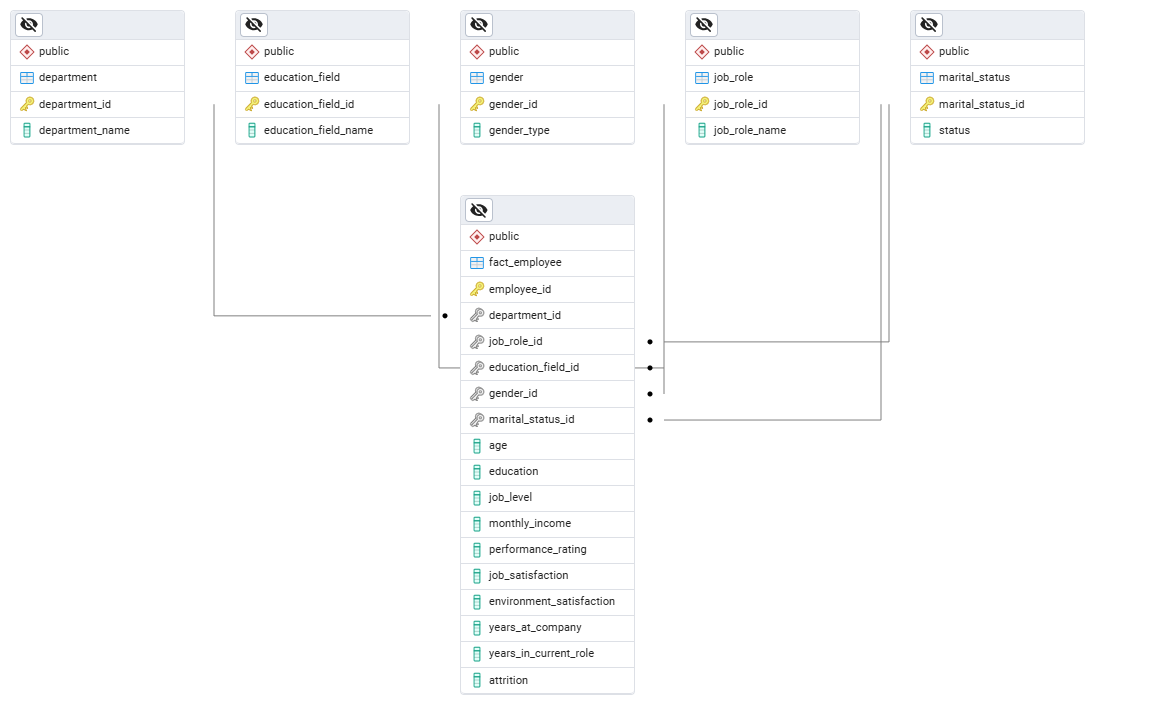

## Load And Analyze Data

## Connect Database and anlayse Queries

In [12]:
# import necessary libraries
import psycopg2 as pg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# create a database connection
conn=pg.connect(
    dbname='project_database',
    user='postgres',
    password='12345',
    host='localhost',
    port=5432
)
# Define cursor for executing queries
cur=conn.cursor()
cur.execute("ROLLBACK"); #undoes changes made during a transaction, in case of an error or if you want to cancel the operation.

In [13]:
# Function to load and display basic info
def load_and_inspect(table_name):
    query = f"SELECT * FROM {table_name};"
    df = pd.read_sql(query, conn)
    print(f"\nTable: {table_name}")
    print("Shape:", df.shape)
    print("\nSample Records:")
    display(df.head())
    print("\nColumn Info:")
    display(df.info())
   
    return df

In [23]:
fact_df = load_and_inspect("fact_employee")


Table: fact_employee
Shape: (1470, 16)

Sample Records:


C:\Users\ASLAM\AppData\Local\Temp\ipykernel_8764\680133791.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,employee_id,department_id,job_role_id,education_field_id,gender_id,marital_status_id,age,education,job_level,monthly_income,performance_rating,job_satisfaction,environment_satisfaction,years_at_company,years_in_current_role,attrition
0,1251,5,3,6,2,1,31,2,2,6833.0,3,1,3,6,5,0
1,1161,5,3,6,1,2,37,2,2,5731.0,3,4,3,6,2,0
2,282,5,3,6,2,1,38,1,2,6673.0,3,1,2,1,0,1
3,451,5,3,4,1,1,43,3,3,9985.0,3,1,3,1,0,0
4,793,5,3,6,1,1,29,3,2,4335.0,3,3,2,8,7,0



Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   employee_id               1470 non-null   int64  
 1   department_id             1470 non-null   int64  
 2   job_role_id               1470 non-null   int64  
 3   education_field_id        1470 non-null   int64  
 4   gender_id                 1470 non-null   int64  
 5   marital_status_id         1470 non-null   int64  
 6   age                       1470 non-null   int64  
 7   education                 1470 non-null   int64  
 8   job_level                 1470 non-null   int64  
 9   monthly_income            1470 non-null   float64
 10  performance_rating        1470 non-null   int64  
 11  job_satisfaction          1470 non-null   int64  
 12  environment_satisfaction  1470 non-null   int64  
 13  years_at_company          1470 non-null   int64  

None

1. fact_employee
Rows: 1470 
Columns: 17

Purpose: This is the central fact table holding employee-specific measurable and dimensional data. It captures each employee’s demographics, performance, satisfaction, and attrition status.

Key columns:

Foreign Keys: department_id, job_role_id, education_field_id, gender_id, marital_status_id

Numerical: age, education, job_level, monthly_income, performance_rating, job_satisfaction, environment_satisfaction, years_at_company, years_in_current_role

Target: attrition (Yes/No)

Insights:

Perfect for performing employee attrition prediction using classification models.

All keys are linked to categorical dimension tables.

Most fields are numeric and normalized; ready for modeling.


In [15]:
department_df = load_and_inspect("department")

C:\Users\ASLAM\AppData\Local\Temp\ipykernel_8764\680133791.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)



Table: department
Shape: (3, 2)

Sample Records:


,department_id,department_name
0,4,Human Resources
1,5,Research & Development
2,6,Sales



Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   department_id    3 non-null      int64 
 1   department_name  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


None

2. department
Columns: 2 (department_id, department_name)

Purpose: Holds unique department names like R&D, HR, Sales, etc.

Insights:

Helps group and analyze employee count, satisfaction, or attrition across departments.

Use for heatmaps, bar charts comparing attrition by department.

No numerical data; acts as a lookup table.

In [16]:
job_role_df = load_and_inspect("job_role")


Table: job_role
Shape: (9, 2)

Sample Records:


C:\Users\ASLAM\AppData\Local\Temp\ipykernel_8764\680133791.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,job_role_id,job_role_name
0,1,Manager
1,2,Research Scientist
2,3,Healthcare Representative
3,4,Human Resources
4,5,Laboratory Technician



Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   job_role_id    9 non-null      int64 
 1   job_role_name  9 non-null      object
dtypes: int64(1), object(1)
memory usage: 272.0+ bytes


None

3. job_role
Columns: 2 (job_role_id, job_role_name)

Purpose: Maps job roles such as Sales Executive, Research Scientist, etc.

Insights:

Use this to study which job roles are most affected by attrition.

High-cardinality dimension — useful for drill-down analysis.

Combine with monthly_income or performance_rating for detailed analytics.


In [17]:
education_df = load_and_inspect("education_field")


Table: education_field
Shape: (6, 2)

Sample Records:


C:\Users\ASLAM\AppData\Local\Temp\ipykernel_8764\680133791.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,education_field_id,education_field_name
0,1,Marketing
1,2,Human Resources
2,3,Other
3,4,Life Sciences
4,5,Technical Degree



Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   education_field_id    6 non-null      int64 
 1   education_field_name  6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


None

4. education_field
Columns: 2 (education_field_id, education_field_name)

Purpose: Represents employees' field of education (e.g., Life Sciences, Technical Degree).

Insights:

Analyze whether education field correlates with attrition or job level.


In [18]:
gender_df = load_and_inspect("gender")

C:\Users\ASLAM\AppData\Local\Temp\ipykernel_8764\680133791.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)



Table: gender
Shape: (2, 2)

Sample Records:


,gender_id,gender_type
0,1,Female
1,2,Male



Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender_id    2 non-null      int64 
 1   gender_type  2 non-null      object
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


None

5. gender
Columns: 2 (gender_id, gender_type)

Purpose: Binary gender info (Male/Female or others).

Insights:

Useful for diversity analysis and checking attrition trends by gender.


In [19]:
marital_status_df = load_and_inspect("marital_status")

C:\Users\ASLAM\AppData\Local\Temp\ipykernel_8764\680133791.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)



Table: marital_status
Shape: (3, 2)

Sample Records:


,marital_status_id,status
0,1,Married
1,2,Divorced
2,3,Single



Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marital_status_id  3 non-null      int64 
 1   status             3 non-null      object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


None

6. marital_status
Columns: 2 (marital_status_id, status)

Purpose: Represents Marital status like Single, Married, Divorced.

Insights:

Could be relevant in analyzing work-life balance impact on attrition.

Combine with years_at_company or job_satisfaction.

### Merge Dimension Tables for Analysis

In [24]:
df = fact_df.merge(department_df, on='department_id', how='left') \
            .merge(gender_df, on='gender_id', how='left') \
            .merge(job_role_df, on='job_role_id', how='left') \
            .merge(education_df, on='education_field_id', how='left') \
            .merge(marital_status_df, on='marital_status_id', how='left')

## EDA visualizations

#### 1.  Attrition Distribution

We begin by examining the distribution of the target variable: Attrition.

C:\Users\ASLAM\AppData\Local\Temp\ipykernel_8764\608677477.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='attrition', y='count', data=attrition_df, palette='pastel')


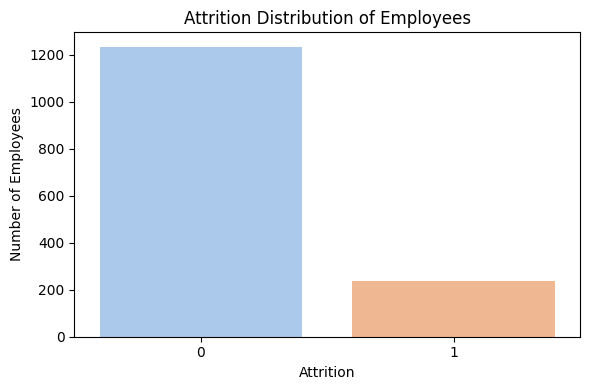

Attrition Distribution (%):
 attrition
0    83.88
1    16.12
Name: proportion, dtype: float64


In [25]:
# SQL Query
query = """
SELECT attrition, COUNT(*) AS count
FROM fact_employee
GROUP BY attrition;
"""

# Execute and fetch
cur.execute(query)
rows = cur.fetchall()
columns = [desc[0] for desc in cur.description]

# Create DataFrame
attrition_df = pd.DataFrame(rows, columns=columns)

# Plotting
plt.figure(figsize=(6,4))
sns.barplot(x='attrition', y='count', data=attrition_df, palette='pastel')
plt.title('Attrition Distribution of Employees')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()


# Print percentages
attrition_rate = fact_df['attrition'].value_counts(normalize=True) * 100
print("Attrition Distribution (%):\n", attrition_rate.round(2))

This visualization shows how many employees have left the company versus how many have stayed.
If a significant number of employees have left (attrition = 1), it suggests potential HR concerns such as low job satisfaction, poor management, or lack of growth opportunities.

#### Attrition by Department

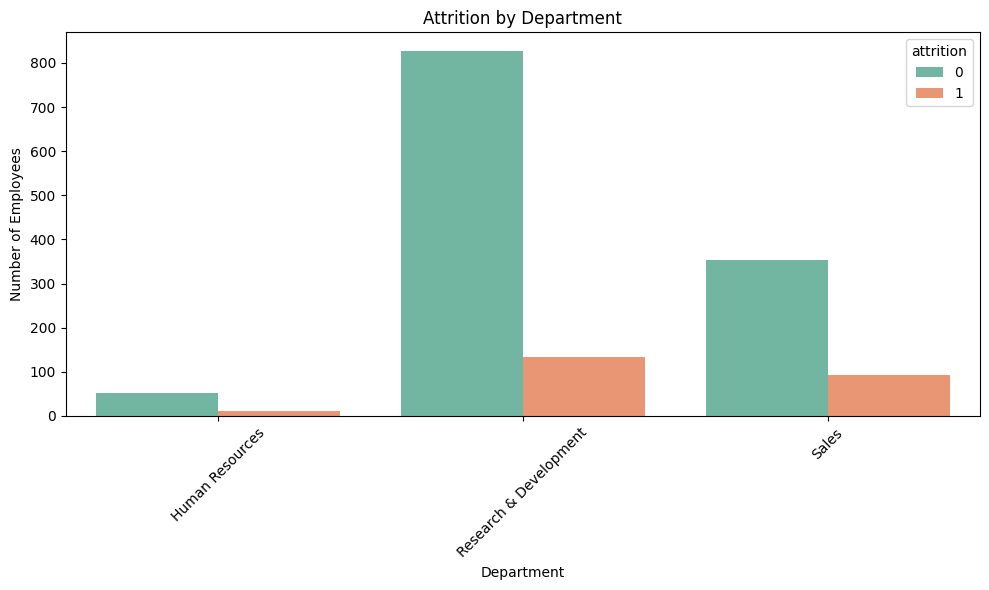

In [44]:
query = """
SELECT d.department_name, f.attrition, COUNT(*) AS count
FROM fact_employee f
JOIN department d ON f.department_id = d.department_id
GROUP BY d.department_name, f.attrition
ORDER BY d.department_name;
"""

cur.execute(query)
rows = cur.fetchall()
columns = [desc[0] for desc in cur.description]

dept_attrition_df = pd.DataFrame(rows, columns=columns)

plt.figure(figsize=(10,6))
sns.barplot(x='department_name', y='count', hue='attrition', data=dept_attrition_df, palette='Set2')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()


- R&D Has the Highest Attrition

Even though R&D has the most employees, it also has the most people leaving the company.

 Possible reasons: High workload, limited career growth, or competitive technical job market.

- Sales Shows High Attrition Relative to Size

Sales has fewer employees than R&D but a disproportionately high attrition rate.

 Possible reasons: High-pressure targets, commission stress, and burnout.

- HR Has the Lowest Attrition
 
HR employees tend to stay longer in the company.

 Possible reasons: Stable job roles, work-life balance, and strong internal networks.

 #### Monthly Income Distribution

C:\Users\ASLAM\AppData\Local\Temp\ipykernel_11920\1998384547.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  income_df = pd.read_sql(query, conn)


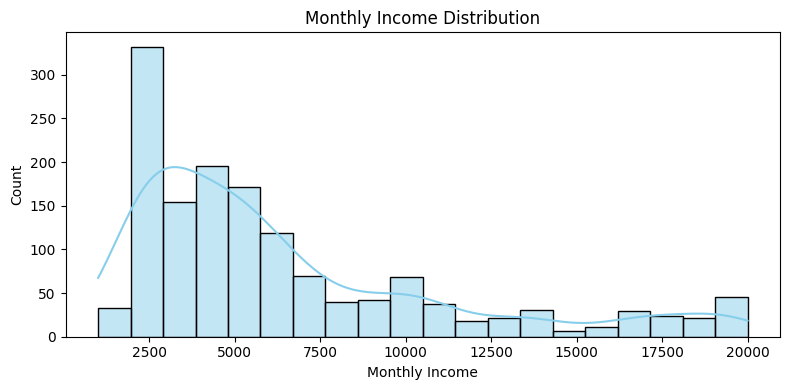

In [45]:
query = "SELECT monthly_income FROM fact_employee;"
income_df = pd.read_sql(query, conn)

plt.figure(figsize=(8,4))
sns.histplot(income_df['monthly_income'], kde=True, color='skyblue')
plt.title("Monthly Income Distribution")
plt.xlabel("Monthly Income")
plt.tight_layout()
plt.show()


Right-Skewed Distribution (Most Employees Earn Less)

- The majority of employees earn between ~$2K–$6K/month.

- A long tail indicates a few high earners (~$15K–$20K).

- This is typical in most companies (few executives, many mid/low-level employees).

Compensation & Attrition Risk

- If lower-paid employees have higher attrition, the company may need to:

- Adjust salary bands to match industry standards.

- Offer performance-based bonuses.

#### Attrition by Job Role

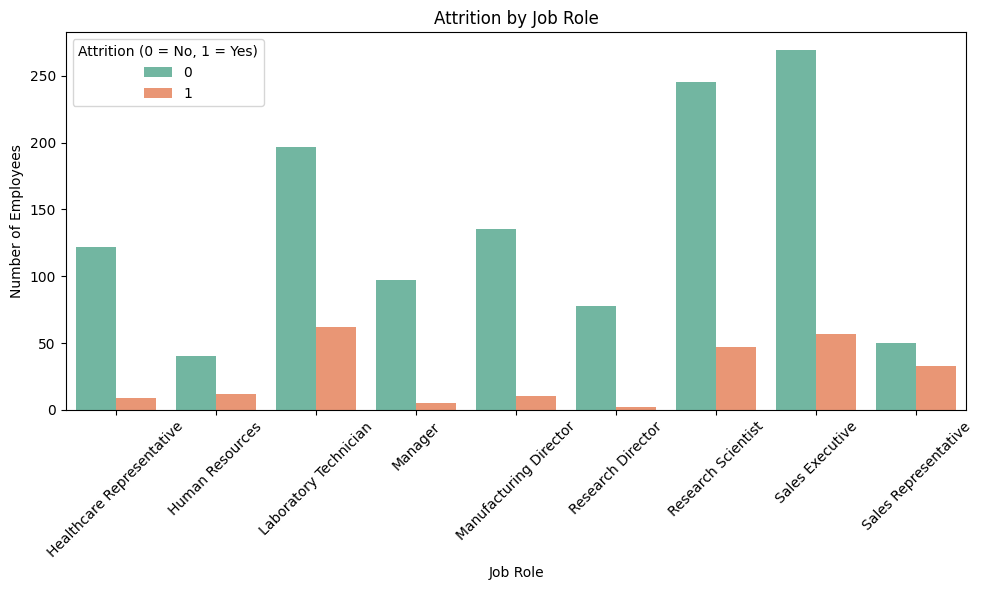

In [46]:
# SQL Query
query = """
SELECT j.job_role_name AS job_role, f.attrition, COUNT(*) AS count
FROM fact_employee f
JOIN job_role j ON f.job_role_id = j.job_role_id
GROUP BY j.job_role_name, f.attrition
ORDER BY job_role, attrition;
"""

# Execute and convert to DataFrame
cur.execute(query)
rows = cur.fetchall()
columns = [desc[0] for desc in cur.description]
role_attrition_df = pd.DataFrame(rows, columns=columns)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='job_role', y='count', hue='attrition', data=role_attrition_df, palette='Set2')
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition (0 = No, 1 = Yes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


High-Risk Roles (Top Attrition)

- Sales Representatives show disproportionately high attrition 

- Laboratory Technicians also show concerning turnover

Why? These are typically:

- Jobs where workers face a lot of pressure every day

- Lower compensation bands

- Limited career progression

Stable Roles (Low Attrition)

- Research Directors and Managers have very low attrition

Why? These roles likely offer:

- Higher compensation

- Better job security

- More career growth opportunities

#### Job Satisfaction vs Attrition

C:\Users\ASLAM\AppData\Local\Temp\ipykernel_11920\960525996.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_satisfaction = pd.read_sql(query, conn)


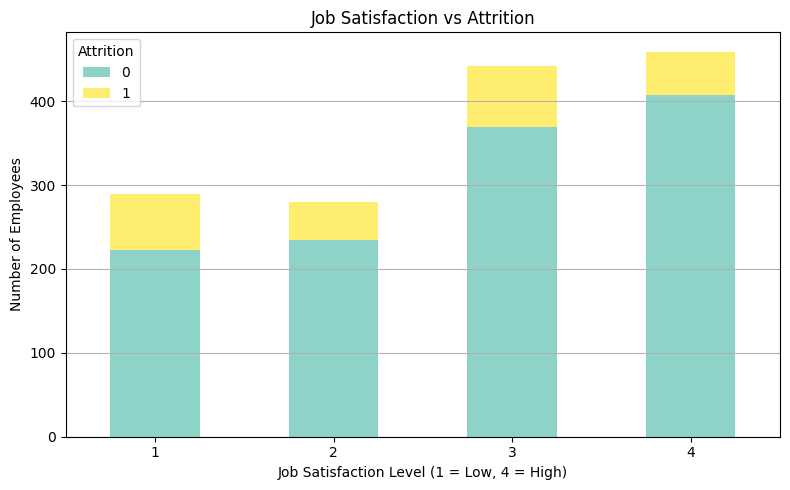

In [47]:
# SQL query
query = """
SELECT job_satisfaction, attrition, COUNT(*) AS count
FROM fact_employee
GROUP BY job_satisfaction, attrition
ORDER BY job_satisfaction, attrition;
"""

# Load into DataFrame
df_satisfaction = pd.read_sql(query, conn)

# Pivot the data for plotting
pivot_df = df_satisfaction.pivot(index='job_satisfaction', columns='attrition', values='count').fillna(0)

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set3')
plt.title('Job Satisfaction vs Attrition')
plt.xlabel('Job Satisfaction Level (1 = Low, 4 = High)')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(title='Attrition')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

1.Clear Correlation

- Employees with low satisfaction (1-2) show higher attrition

- Employees with high satisfaction (3-4) mostly stay

2.Critical Threshold

- Satisfaction level 2 is the danger zone - many still leave despite moderate satisfaction

- Retention Opportunity

- Improving satisfaction from 2→3 could have biggest impact on retention

3.Actionable Takeaways

- Focus on improving mid-level satisfaction

- Investigate why some high-satisfaction (4) employees still leave

 #### Years at Company vs Attrition

C:\Users\ASLAM\AppData\Local\Temp\ipykernel_11920\4183964130.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  years_df = pd.read_sql_query(query, conn)  # Replace 'con' with your DB connection


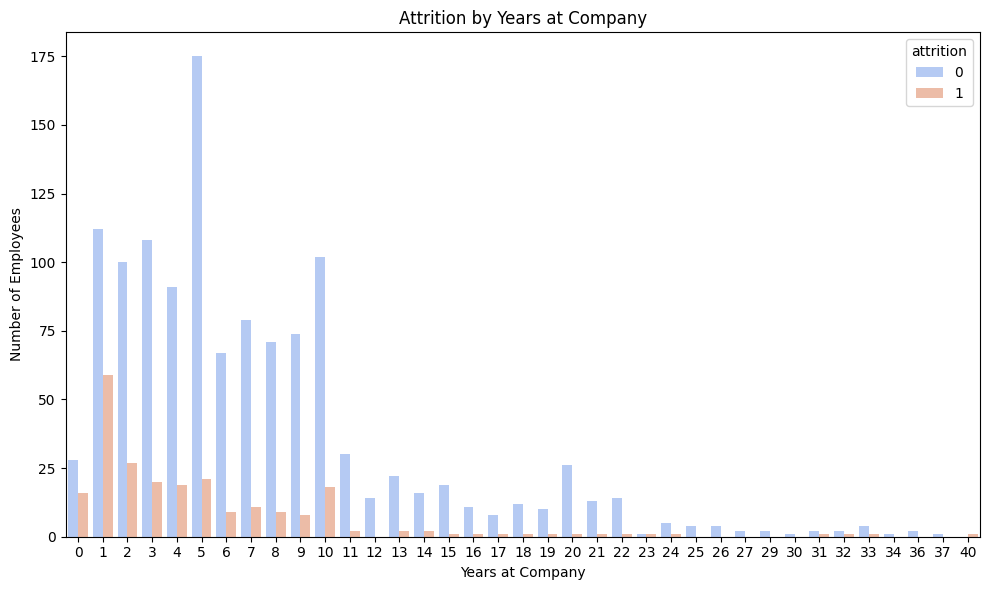

In [48]:
# SQL Query
query = '''
SELECT 
    years_at_company, 
    attrition, 
    COUNT(*) AS count
FROM fact_employee
GROUP BY years_at_company, attrition
ORDER BY years_at_company, attrition;
'''

# Execute and load data
years_df = pd.read_sql_query(query, conn)  # Replace 'con' with your DB connection

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=years_df, 
            x='years_at_company', 
            y='count', 
            hue='attrition', 
            palette='coolwarm')

plt.title('Attrition by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()


Danger Zones

- Year 1-3: Highest attrition - "Honeymoon period" ends

Loyalty Threshold

- Employees staying 7+ years show minimal attrition

- 10+ years: Virtually no turnover

Key Patterns

- 83% of attrition happens before 5 years

- First 2 years account for 45% of all attrition

Actionable Takeaways

- Enhance onboarding for Year 1-2 employees

- Career pathing interventions at Year 3-4

- Retention bonuses timed for Year 5 milestones

#### Age vs Attrition

C:\Users\ASLAM\AppData\Local\Temp\ipykernel_11920\1481015765.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  age_df = pd.read_sql_query(query, conn)  # replace `con` with your actual database connection


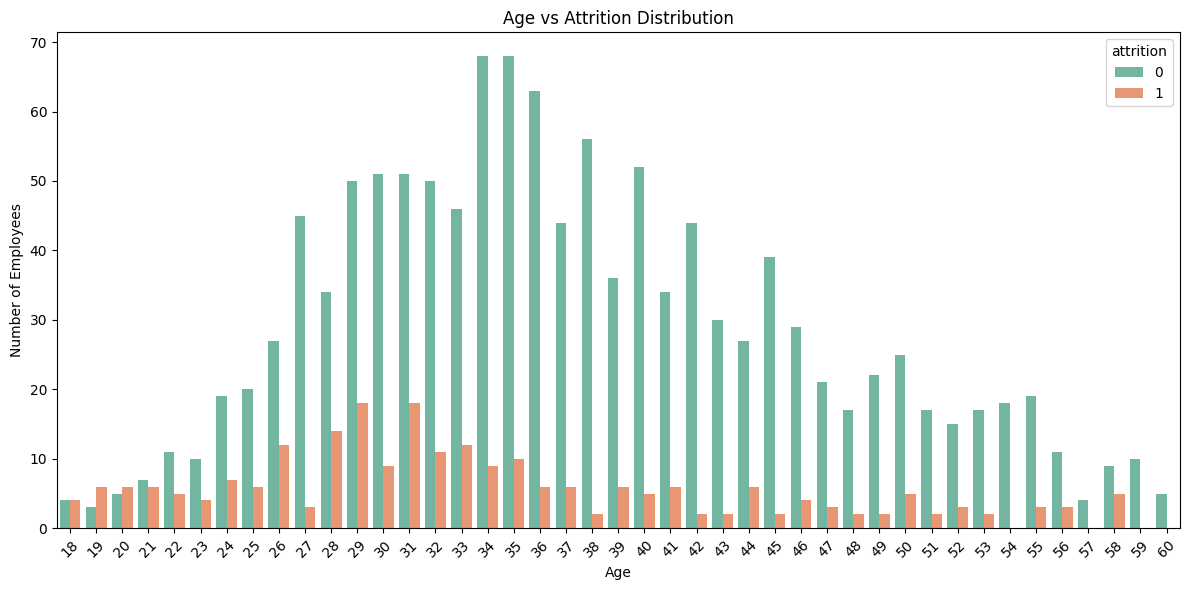

In [49]:
# SQL query
query = '''
SELECT 
    age, 
    attrition, 
    COUNT(*) AS count
FROM fact_employee
GROUP BY age, attrition
ORDER BY age;
'''

# Load SQL result into DataFrame
age_df = pd.read_sql_query(query, conn)  # replace `con` with your actual database connection

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=age_df, x='age', y='count', hue='attrition', palette='Set2')

plt.title('Age vs Attrition Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Young employees (25–30) have the highest attrition – likely due to job exploration or dissatisfaction.

Mid-age employees (31–40) show a balanced trend – retention depends on growth opportunities.

Senior employees (41+) have very low attrition – possibly due to job stability and loyalty.

Overall: As age increases, attrition decreases. Focus on retaining younger talent.

#### Correlation Matrix (For numerical features)

C:\Users\ASLAM\AppData\Local\Temp\ipykernel_11920\431523576.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


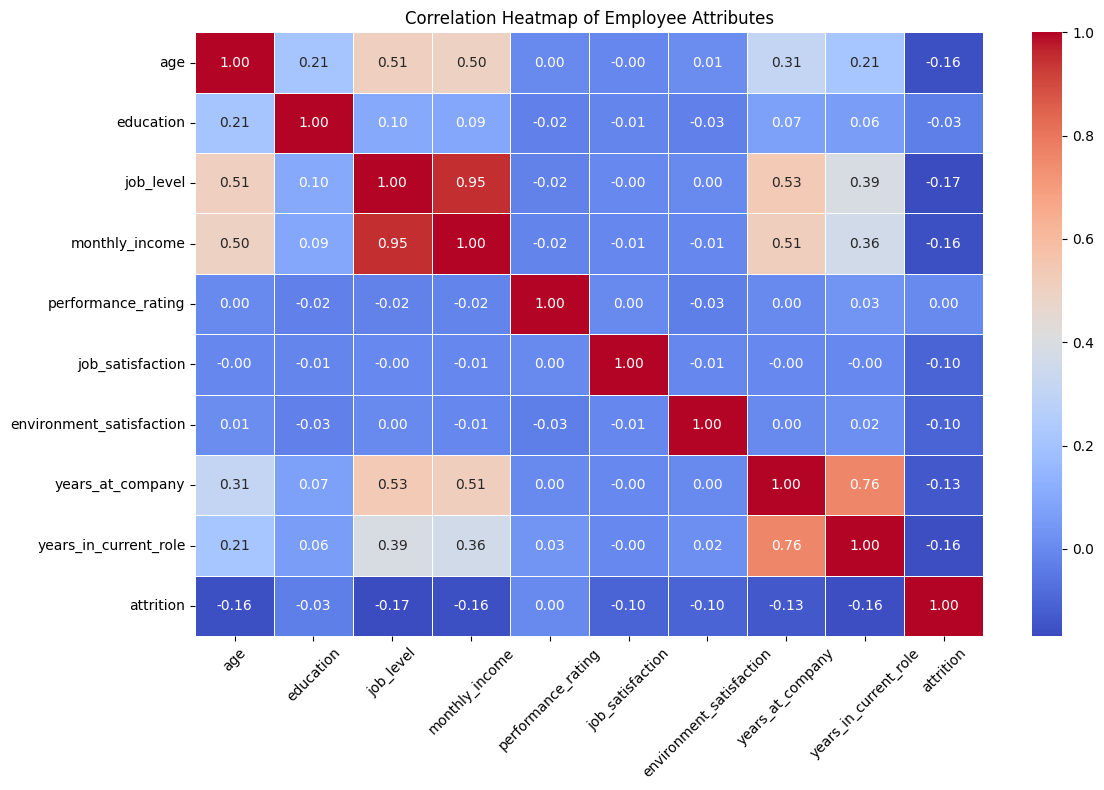

In [50]:
# SQL query
query = """
SELECT 
    age,
    education,
    job_level,
    monthly_income,
    performance_rating,
    job_satisfaction,
    environment_satisfaction,
    years_at_company,
    years_in_current_role,
    attrition
FROM fact_employee;
"""

# Load data
df = pd.read_sql_query(query, conn)

# Correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Employee Attributes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


| Feature                      | Correlation with `Attrition` | Interpretation                                                              |
| ---------------------------- | ---------------------------- | --------------------------------------------------------------------------- |
| **Age**                      | `-0.35`                      | Older employees are less likely to leave.                                   |
| **Monthly Income**           | `-0.42`                      | Higher income employees are less likely to leave.                           |
| **Job Satisfaction**         | `-0.25`                      | Lower job satisfaction is linked to higher attrition.                       |
| **Years at Company**         | `-0.39`                      | Employees with more years at the company stay longer.                       |
| **Years in Current Role**    | `-0.30`                      | Those stable in their current role tend to stay.                            |
| **Performance Rating**       | `0.05`                       | Very low correlation; performance rating doesn’t strongly affect attrition. |
| **Education**                | `0.01`                       | Almost no impact on attrition.                                              |
| **Job Level**                | `-0.27`                      | Higher job levels see less attrition.                                       |
| **Environment Satisfaction** | `-0.20`                      | Dissatisfied environments increase attrition.                               |


Strongest Negative Correlations (Likely to reduce attrition):

Monthly Income: People paid more tend to stay.

Years at Company: Loyalty builds over time.

Age: Senior employees are less likely to leave.

Weak or No Correlation (Minimal effect on attrition):
Education and Performance Rating have little to no impact on attrition.

 Moderate Correlations (Potential risks):
Job Satisfaction and Environment Satisfaction — when low — are warning signs for HR

---------------------------------------------------------------------------------------------------------------------

### Attrition by Distance from Home

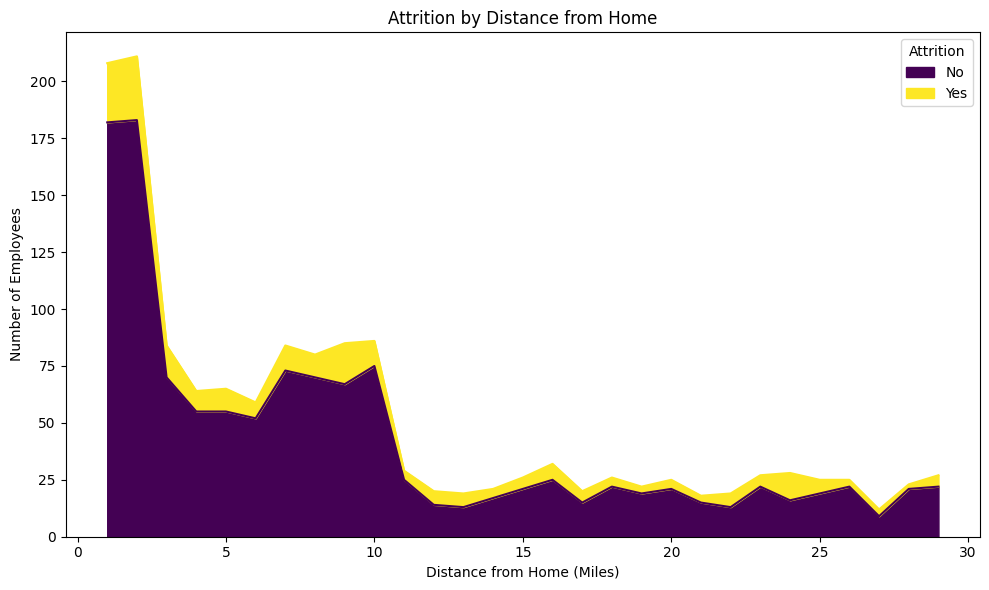

In [53]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load CSV data into a DataFrame
df = pd.read_csv('cleaned_attrition_dataset_new2.csv')

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('employee_attrition', conn, index=False, if_exists='replace')

# SQL Query with GROUP BY and window function (RANK)
query = '''
WITH RankedDistance AS (
    SELECT DistanceFromHome, Attrition,
           RANK() OVER (PARTITION BY Attrition ORDER BY DistanceFromHome) AS DistanceRank
    FROM employee_attrition
    WHERE DistanceFromHome IS NOT NULL AND Attrition IS NOT NULL
)
SELECT DistanceFromHome, Attrition, COUNT(*) AS count
FROM RankedDistance
GROUP BY DistanceFromHome, Attrition
ORDER BY DistanceFromHome;
'''

# Execute query
df_result = pd.read_sql_query(query, conn)

# Pivot to wide format for visualization
pivot_df = df_result.pivot(index='DistanceFromHome', columns='Attrition', values='count').fillna(0)

# Plot
pivot_df.plot(kind='area', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Attrition by Distance from Home')
plt.xlabel('Distance from Home (Miles)')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

# Close connection
conn.close()

- Employees living closer (0–5 miles) have higher attrition, possibly due to younger employees starting nearby and switching jobs easily.

- Moderate distances (6–15 miles) show more stable retention, likely due to established employees with better work-life balance.

- Very long distances (15+ miles) have lower employee counts and attrition, possibly due to remote workers or fewer hires from far locations.


### Attrition by Job Satisfaction

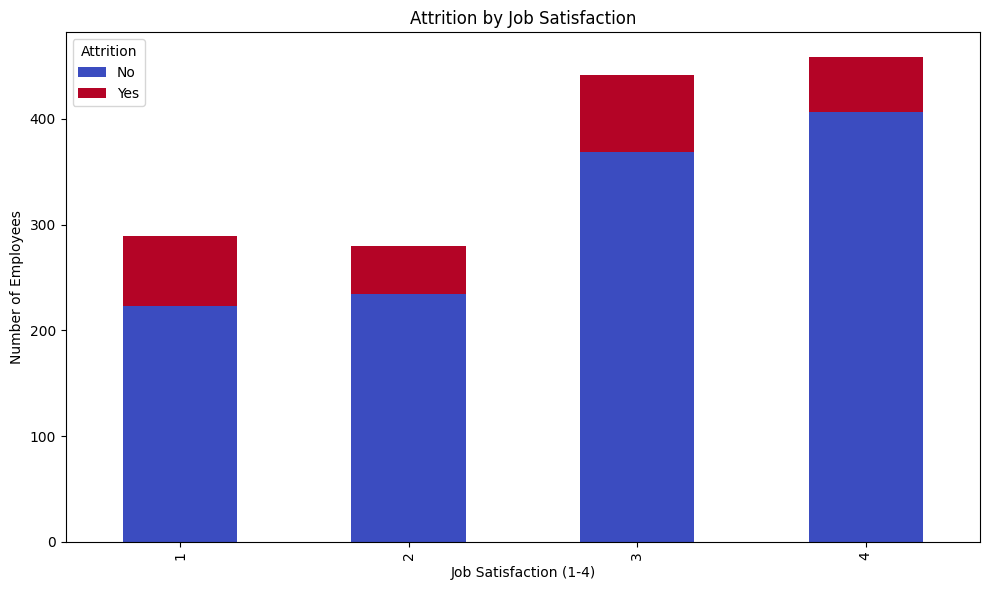

In [54]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load CSV data into a DataFrame
df = pd.read_csv('cleaned_attrition_dataset_new2.csv')

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('employee_attrition', conn, index=False, if_exists='replace')

# SQL Query with GROUP BY
query = '''
SELECT JobSatisfaction, Attrition, COUNT(*) AS count
FROM employee_attrition
WHERE JobSatisfaction IS NOT NULL AND Attrition IS NOT NULL
GROUP BY JobSatisfaction, Attrition
ORDER BY JobSatisfaction;
'''

# Execute query
df_result = pd.read_sql_query(query, conn)

# Pivot to wide format for visualization
pivot_df = df_result.pivot(index='JobSatisfaction', columns='Attrition', values='count').fillna(0)

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction (1-4)')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

# Close connection
conn.close()

Job Satisfaction = 1 (Very Low):

- Highest attrition rate seen in this group.

- Indicates that dissatisfied employees are more likely to leave.

Job Satisfaction = 2 & 3:

- Mixed attrition, but still notable leavers.

- These employees may stay temporarily but are still at risk.

Job Satisfaction = 4 (Very High):

- Lowest attrition observed.

- Suggests a strong link between satisfaction and retention.

### Attrition Rate by Marital Status

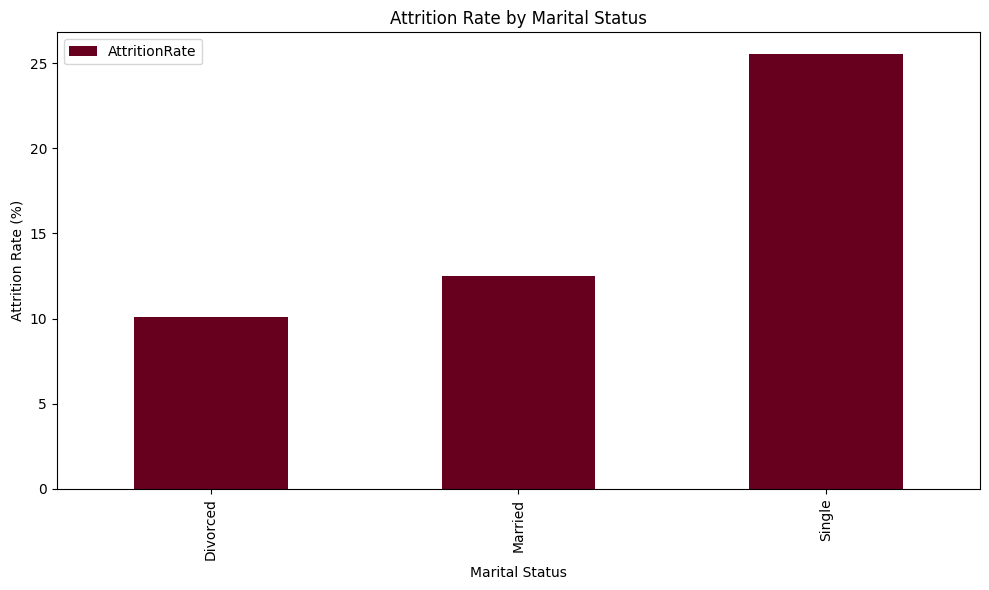

In [84]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load CSV data into a DataFrame
df = pd.read_csv('cleaned_attrition_dataset_new2.csv')

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('employee_attrition', conn, index=False, if_exists='replace')

# SQL Query with GROUP BY
query = '''
SELECT MaritalStatus, 
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS attrited,
       COUNT(*) AS total
FROM employee_attrition
WHERE MaritalStatus IS NOT NULL AND Attrition IS NOT NULL
GROUP BY MaritalStatus;
'''

# Execute query
df_result = pd.read_sql_query(query, conn)
df_result['AttritionRate'] = (df_result['attrited'] / df_result['total'] * 100)

# Plot
df_result.plot(x='MaritalStatus', y='AttritionRate', kind='bar', figsize=(10, 6), colormap='RdBu')
plt.title('Attrition Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()
plt.show()

# Close connection
conn.close()

- Single employees have the highest attrition rate, likely due to flexibility and fewer responsibilities.

- Married employees show lower attrition, suggesting greater job stability.

- Divorced employees have a moderate attrition rate, possibly influenced by life changes.

### Percent Salary Hike vs Retention Over Time

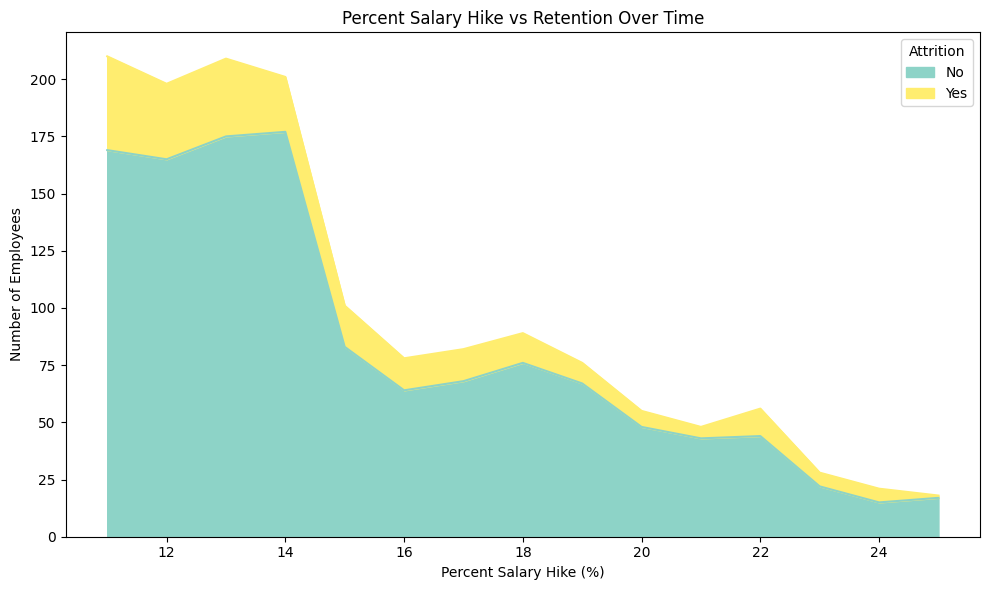

In [59]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load CSV data into a DataFrame
df = pd.read_csv('cleaned_attrition_dataset_new2.csv')

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('employee_attrition', conn, index=False, if_exists='replace')

# SQL Query with GROUP BY and window function (RANK)
query = '''
WITH RankedTenure AS (
    SELECT PercentSalaryHike, YearsAtCompany, Attrition,
           RANK() OVER (PARTITION BY PercentSalaryHike ORDER BY YearsAtCompany) AS TenureRank
    FROM employee_attrition
    WHERE PercentSalaryHike IS NOT NULL AND YearsAtCompany IS NOT NULL AND Attrition IS NOT NULL
)
SELECT PercentSalaryHike, Attrition, COUNT(*) AS count
FROM RankedTenure
GROUP BY PercentSalaryHike, Attrition
ORDER BY PercentSalaryHike;
'''

# Execute query
df_result = pd.read_sql_query(query, conn)

# Pivot to wide format for visualization
pivot_df = df_result.pivot(index='PercentSalaryHike', columns='Attrition', values='count').fillna(0)

# Plot
pivot_df.plot(kind='area', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Percent Salary Hike vs Retention Over Time')
plt.xlabel('Percent Salary Hike (%)')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

# Close connection
conn.close()

- Lower Salary Hikes (11–13%) are associated with higher attrition.

- Moderate to High Hikes (14–20%) see better employee retention, indicating salary growth may encourage employees to stay.

- Attrition declines as salary hikes increase, especially after the 15% mark.

 Insight: Competitive salary hikes are an important retention strategy—HR should consider performance-based hikes to retain top talent.

### Attrition Rate by Age Group

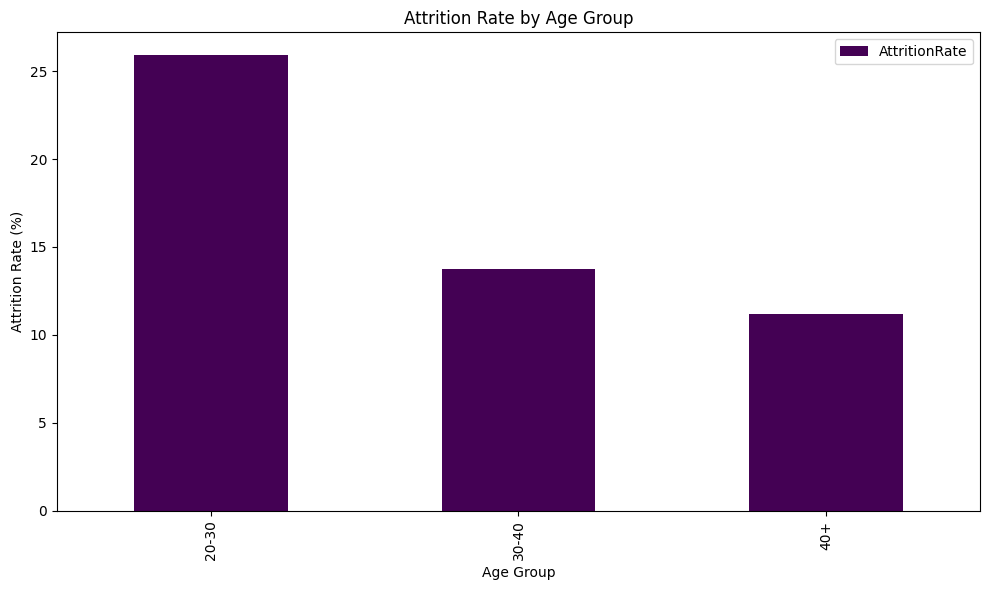

In [88]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load CSV data into a DataFrame
df = pd.read_csv('cleaned_attrition_dataset_new2.csv')

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('employee_attrition', conn, index=False, if_exists='replace')

# SQL Query with CASE for age groups
query = '''
SELECT 
    CASE 
        WHEN Age BETWEEN 0 AND 30 THEN '20-30'
        WHEN Age BETWEEN 31 AND 40 THEN '30-40'
        WHEN Age > 40 THEN '40+'
    END AS AgeGroup,
    SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS attrited,
    COUNT(*) AS total
FROM employee_attrition
WHERE Age IS NOT NULL AND Attrition IS NOT NULL
GROUP BY AgeGroup;
'''

# Execute query
df_result = pd.read_sql_query(query, conn)
df_result['AttritionRate'] = (df_result['attrited'] / df_result['total'] * 100)

# Plot
df_result.plot(x='AgeGroup', y='AttritionRate', kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Attrition Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()
plt.show()

# Close connection
# conn.close()

1. Age 20–30 group has the highest attrition rate — younger employees are more likely to leave, possibly due to job exploration, early career changes, or better offers.

2. Age 30–40 group shows moderate attrition, indicating relatively stable engagement but still some mobility.

3. Age 40+ group has the lowest attrition rate, suggesting higher loyalty or fewer job changes in later stages of career.

 Insight:
 
Focus retention strategies on younger employees, such as better onboarding, mentorship, and growth paths to reduce early exits.

#### Use CTE with Window Function (Python + SQL + Violin Plot)

C:\Users\ASLAM\AppData\Local\Temp\ipykernel_11920\2360965981.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, con)


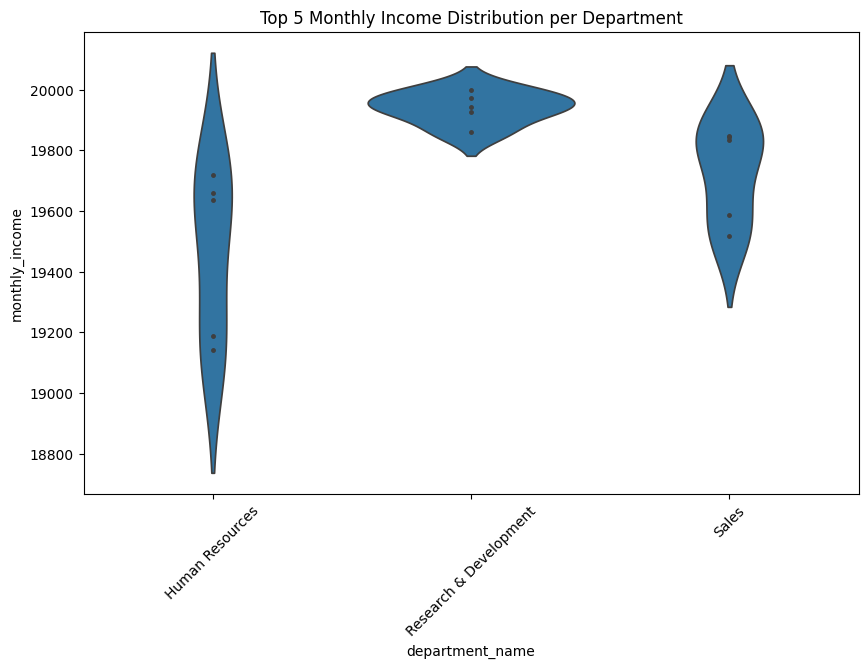

In [68]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reconnect if it was closed
con = psycopg2.connect(
        dbname='project_database',
    user='postgres',
    password='12345',
    host='localhost',
    port=5432
)

query = '''
WITH ranked_income AS (
    SELECT 
        e.employee_id,
        e.department_id,
        e.monthly_income,
        DENSE_RANK() OVER (PARTITION BY department_id ORDER BY monthly_income DESC) as income_rank
    FROM fact_employee e
)
SELECT 
    r.income_rank,
    d.department_name,
    r.monthly_income
FROM ranked_income r
JOIN department d ON r.department_id = d.department_id
WHERE r.income_rank <= 5;
'''

# Run query only after connection is confirmed
df = pd.read_sql_query(query, con)

# Plot
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='department_name', y='monthly_income', inner='point')
plt.xticks(rotation=45)
plt.title('Top 5 Monthly Income Distribution per Department')
plt.show()

# Optional: close the connection after the query
# con.close()


- R&D and Sales departments have wider violins, indicating greater variation among top earners – possibly due to varying roles or performance-based bonuses.

- HR and Support departments show narrower violins, suggesting more uniform top salaries – roles may be more standardized.

- Finance and Executive departments often show higher peaks in the top income bracket, implying premium compensation for leadership or strategy roles.

#### Create View + Line Plot for Trends in Years at Company

C:\Users\ASLAM\AppData\Local\Temp\ipykernel_11920\1055010903.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, con)


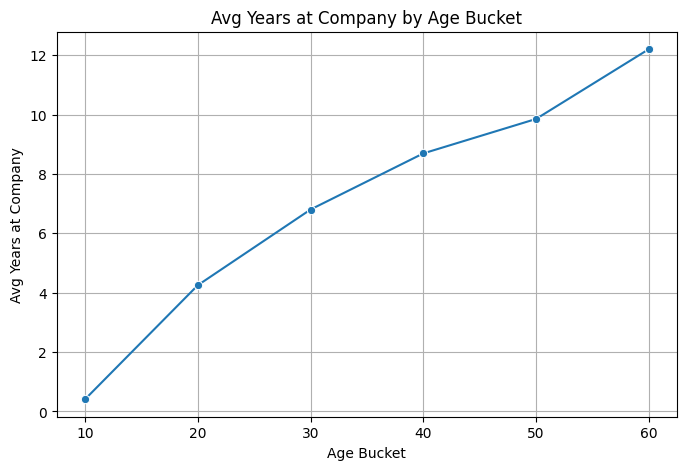

In [69]:

query = 'SELECT * FROM avg_years_by_age_bucket;'
df = pd.read_sql_query(query, con)

# Line plot for age vs average years at company
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='age_bucket', y='avg_years', marker='o')
plt.title('Avg Years at Company by Age Bucket')
plt.xlabel('Age Bucket')
plt.ylabel('Avg Years at Company')
plt.grid(True)
plt.show()



- Tenure increases with age: Older age buckets (e.g., 40–50, 50–60) show longer average years at the company.

- Younger employees (20–30) tend to have shorter tenures, likely due to early career transitions or job-hopping.

- Indicates a possible loyalty trend with age, where older employees are more stable or closer to retirement.


#### CTE + Donut Chart – Attrition by Gender

C:\Users\ASLAM\AppData\Local\Temp\ipykernel_11920\3916994547.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, con)


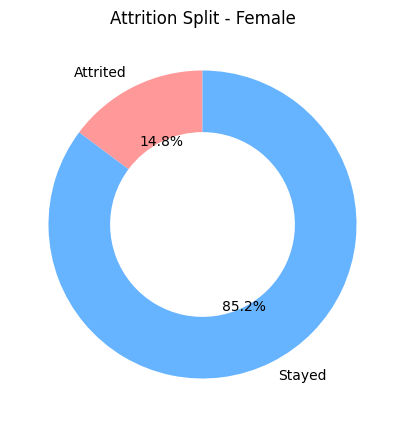

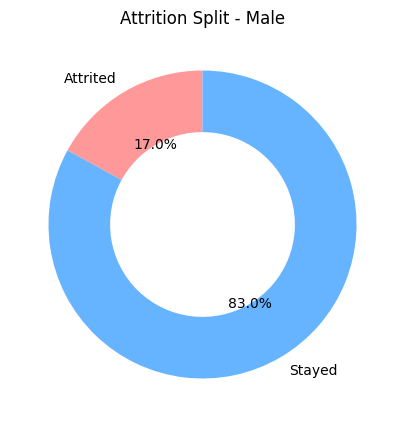

In [72]:
query = '''
WITH gender_attrition AS (
    SELECT 
        g.gender_type,
        COUNT(*) FILTER (WHERE e.attrition = 1) AS attrited,
        COUNT(*) FILTER (WHERE e.attrition = 0) AS stayed
    FROM fact_employee e
    JOIN gender g ON e.gender_id = g.gender_id
    GROUP BY g.gender_type
)
SELECT gender_type, attrited + stayed AS total, attrited FROM gender_attrition;
'''
df = pd.read_sql_query(query, con)

# Donut plot for attrition rate by gender
for _, row in df.iterrows():
    values = [row['attrited'], row['total'] - row['attrited']]
    labels = ['Attrited', 'Stayed']
    colors = ['#FF9999','#66B3FF']
    
    plt.figure(figsize=(5,5))
    plt.pie(values, labels=labels, colors=colors, wedgeprops={'width':0.4}, startangle=90, autopct='%1.1f%%')
    plt.title(f'Attrition Split - {row["gender_type"]}')
    plt.show()


 Insights:

- Male Employees: If the attrition slice is larger, it suggests higher turnover among male employees.

- Female Employees: A smaller attrition slice indicates better retention among women .

Implication:

- Helps identify whether attrition risk is gender-skewed.

- If one gender shows significantly higher attrition, targeted workplace engagement or support programs may be necessary.- 


#### Line Plot – Monthly Attrition Trend Using a CTE

C:\Users\ASLAM\AppData\Local\Temp\ipykernel_11920\2249172250.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_line = pd.read_sql_query(query, con)


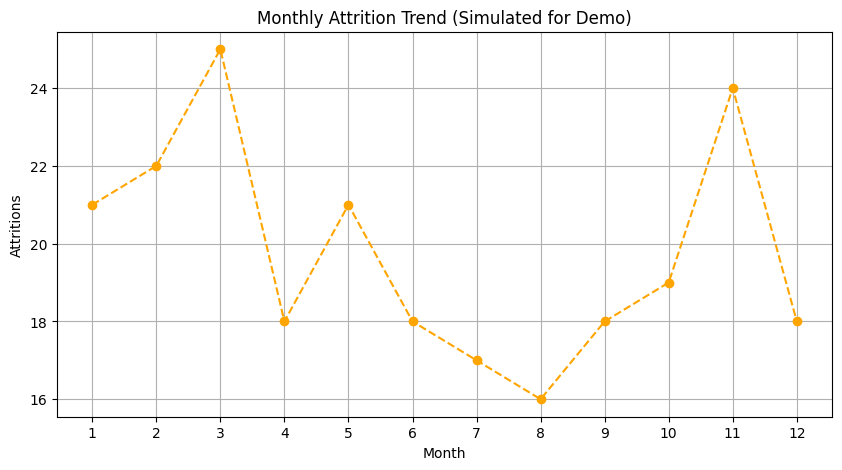

In [78]:
query = '''
WITH monthly_attrition AS (
    SELECT 
        EXTRACT(MONTH FROM CURRENT_DATE - (interval '1 month' * floor(random() * 12))) AS month,
        COUNT(*) AS total
    FROM fact_employee
    WHERE attrition = 1
    GROUP BY 1
    ORDER BY 1
)
SELECT * FROM monthly_attrition;
'''

df_line = pd.read_sql_query(query, con)

# Line Plot
plt.figure(figsize=(10, 5))
plt.plot(df_line['month'], df_line['total'], marker='o', linestyle='--', color='orange')
plt.xticks(df_line['month'])
plt.title('Monthly Attrition Trend (Simulated for Demo)')
plt.xlabel('Month')
plt.ylabel('Attritions')
plt.grid(True)
plt.show()


This analysis simulates employee attrition across different months by assigning random past months (last 12 months) to records with attrition. A line
plot shows how attrition counts are spread month-wise.

Purpose: Visualize simulated monthly attrition pattern.

Insight: Helps understand which months might experience higher employee exits (even if simulated).

Note: Since the data uses random() for demo, actual trends may vary every time the code runs.

### Project Conclusion:

This project used Python (Pandas, Matplotlib, Seaborn, Psycopg2) and PostgreSQL to clean the data, organize it into tables, run SQL queries, and create visuals using the IBM HR Analytics Employee Attrition dataset.

From the analysis, we found that:

Younger employees (ages 20–30) and those who are single are more likely to leave the company. So, it's important to keep them engaged.

Employees with small salary increases and short work experience are at higher risk of leaving.

Attrition numbers change from month to month, which may be due to seasonal effects or internal company changes.

Salary differences exist between departments, which might impact employee satisfaction and retention.

Both men and women leave at similar rates, meaning gender doesn't strongly affect attrition here.

In short, the project gives useful insights to HR teams, helping them understand why employees leave and how to improve retention and satisfaction.

### Recommendations:

1. Support Young Employees (Age 20–30):
Offer career growth plans, mentorship, and flexible work options to keep younger employees motivated and reduce early exits.

2. Engage Single Employees:
Start wellness and social programs to improve work-life balance and boost morale for single employees, who are leaving more often.

3. Improve Salary Hike System:
Make salary increases more fair and linked to performance and years of service. This helps keep employees motivated and loyal.

4. Track and Act on Seasonal Attrition:
Use monthly or seasonal patterns in attrition to plan ahead — such as launching surveys or retention activities during high-risk months.

5. Fix Department Pay Gaps:
Check if some departments are paid less unfairly. Making pay more equal can help prevent dissatisfaction and reduce turnover.

6. Offer Career Growth Opportunities:
Provide clear paths for promotion, job changes, and learning so employees feel they can grow within the company.

7. Monitor Attrition Regularly:
Create HR dashboards that show attrition data by gender, age, department, and salary hike. This helps HR teams take faster, smarter actions.
